                                   Sales Analysis 

In [12]:
import pandas as pd
import numpy as np
import os
import glob

In [4]:
data = pd.read_csv('D:\Class\Data collection\Sales Analysis\Sales_January_2019.csv')

Merging all the month file to one file for analysis

If the file names start in same name use this method

Task 1 

In [19]:
# merging the files
files = os.path.join("D:\Class\Data collection\Sales Analysis", "Sales*.csv")

In [20]:
# A list of all files is returned
all_data = glob.glob(files)

In [66]:
# Finally, the files are joined
sales = pd.concat(map(pd.read_csv, all_data), ignore_index=True)
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [47]:
#To save the file
sales.to_csv('All_month_sales.csv',index=False)

Question to answer
- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?

Q1 - What was the best month for sales? How much was earned that month?

In [75]:
#To clean the NaN values
sales[sales['Month'].isna()]
sales = sales.dropna(how='all')
#To clear all 'Or' values in dataset
sales = sales[sales['Month']!='Or']

In [76]:
#First create the seperate column for month from order Date
sales['Month'] = sales['Order Date'].str[:2]
#it is in string type so convert in integer
sales['Month']= sales['Month'].astype('int32')
#ValueError: cannot convert float NaN to integer
#invalid literal for int() with base 10: 'Or'

In [77]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [119]:
#Answering to the above question
#TypeError: can't multiply sequence by non-int of type 'str'
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'])
sales['Price Each'] = pd.to_numeric(sales['Price Each'])

#Creating the new column fro Sale_amount
sales['sale_amount'] = sales['Quantity Ordered'] * sales['Price Each']

#Q1 - What was the best month for sales? How much was earned that month?
Best_month_sales = sales.groupby('Month').sum()
Best_month_sales.sort_values(by='sale_amount',ascending = False)

,Quantity Ordered,Price Each,sale_amount
Month,,,
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
2,13449,2188884.72,2202022.42
1,10862,1803264.98,1813586.44
6,19,2527.52,2537.34


In [99]:
import matplotlib.pyplot as plt

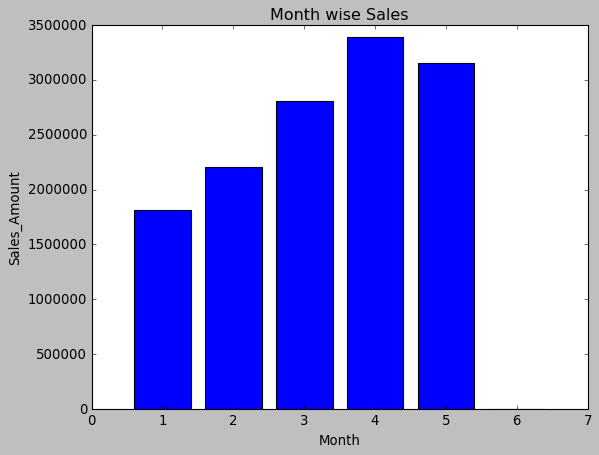

In [134]:
month=[1,2,3,4,5,6]
plt.bar(month,Best_month_sales.sale_amount)
#plt.grid()
plt.xlabel('Month')
plt.ylabel('Sales_Amount')
plt.title('Month wise Sales')
plt.style.use('classic')
plt.show()

Q2- What city sold the most product?

In [1]:
#First split the column of Address to create the City
#sales[['Door No','City','State']] = sales['Purchase Address'].str.split(',',expand=True)
#sales= sales.drop(columns=['Door No','City','State'])
#sales.City.unique()

#using another method for split
sales['state'] =sales['Purchase Address'].apply(lambda x: x.split(',')[2])
sales['stateName'] =sales['state'].apply(lambda x: x.split(' ')[1])
#sales['City'] =sales['Purchase Address'].apply(lambda x: x.split(',')[1]+' '+['stateName'])

NameError: name 'sales' is not defined

In [188]:
sales.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sale_amount,Column,state,stateName
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,CA
